<a href="https://colab.research.google.com/github/athersoft/ADA-Informes/blob/main/Informe12%20-%20Bellman-Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema del camino más corto con fuente única

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

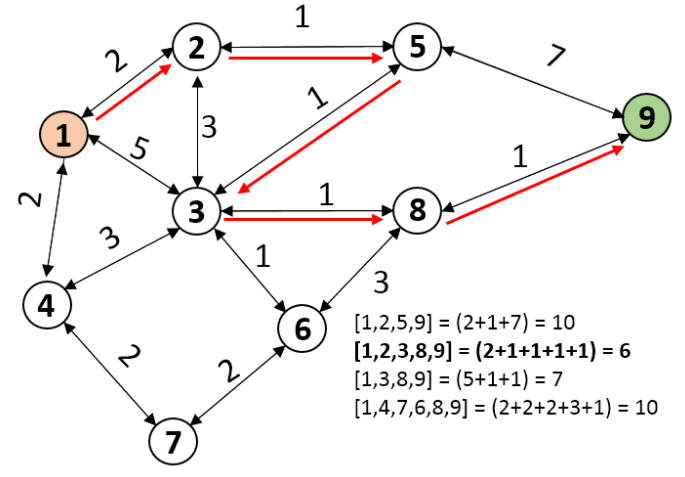

#1-Descipción del problema

El problema del camino más corto con fuente única consiste en hallar el conjunto de caminos desde algún nodo hacia todos los demás nodos de un grafo dirigido, siendo la distancia el valor de los arcos que conectan a los nodos.

Para resolver este problema analízaremos una solución greedy y otra dinámica, siendo estas el algoritmo de Dijktra y el algoritmo de Bellman-Ford respectivamente.

#2-Descripción del algoritmo

#2.1-Algoritmo de Dijktra

Este algoritmo selecciona en cada paso el camino más corto disponible hacia otro nodo no visitado, empezando por un nodo base y extendiéndose hacia sus hijos más cercanos.

Esta solución se considera greedy debido a que en cada paso selecciona el camino más corto disponible, sin tomar en cuenta otras posibles combinaciones de caminos.

Este algoritmo requiere que los arcos del grafo sean positivos.

###Código:

Vertice Distancia desde Origen
0		0
1		4
2		13
3		19
4		15
5		24
6		7
7		8
8		11


{0: 0, 1: 4, 2: 13, 3: 19, 4: 15, 5: 24, 6: 7, 7: 8, 8: 11}

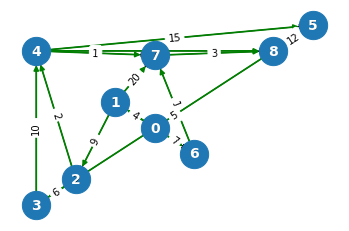

In [4]:
from queue import PriorityQueue

class Graph2:
 
    def __init__(self, vertices):
        self.v = vertices  
        self.graph = []
        self.edges = [[-1 for i in range(vertices)] for j in range(vertices)]
        self.visited = []
 

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])
 

    def printArr(self, dist):
        print("Vertice Distancia desde Origen")
        for i in range(self.v):
            print("{0}\t\t{1}".format(i, dist[i]))

    def dijkstra(self, start_vertex, mostrar, visualize = True):
        D = {v:float('inf') for v in range(self.v)}
        D[start_vertex] = 0

        pq = PriorityQueue()
        pq.put((0, start_vertex))

        while not pq.empty():
            (dist, current_vertex) = pq.get()
            self.visited.append(current_vertex)

            for u, v, weight in self.graph:
              if(weight != -1):
                distance = weight
                if v not in self.visited:
                  old_cost = D[v]
                  new_cost = D[u] + distance
                  
                  if new_cost < old_cost:
                    pq.put((u,v))
                    D[v] = new_cost

        if mostrar:
          self.printArr(D)

        if visualize:
          G = nx.DiGraph()
          for u, v, weight in self.graph:
              G.add_node(u)
              G.add_node(v)
              G.add_edge(u, v, weight = weight)
                
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout(G, prog = "twopi")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)
          nx.draw(G,pos,with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =1.75, edge_color ="green")
          
        return D

visualize = True
g = Graph2(9)
g.add_edge(0, 1, 4)
g.add_edge(0, 6, 7)
g.add_edge(1, 6, 11)
g.add_edge(1, 7, 20)
g.add_edge(1, 2, 9)
g.add_edge(2, 3, 6)
g.add_edge(2, 4, 2)
g.add_edge(3, 4, 10)
g.add_edge(3, 5, 5)
g.add_edge(4, 5, 15)
g.add_edge(4, 7, 1)
g.add_edge(4, 8, 5)
g.add_edge(5, 8, 12)
g.add_edge(6, 7, 1)
g.add_edge(7, 8, 3) 

g.dijkstra(0, True, visualize)

#2.1 Algoritmo de Bellman-Ford

Este algoritmo a diferencia del anterior, si considera arcos negativos, además de que detecta ciclos negativos.

Este algoritmo crea un arreglo de largo $V$ siendo $V$ el número de nodos presentes en el grafo, este se inicializa en infinito a excepción de la primera posición que se inicializa en 0, siendo esta la que representa el nodo base.

El algoritmo primero calcula la distancia más corta que contiene al menos un nodo en el camino, luego la distancia que contiene al menos 2 nodos y así sucesivamente durante $i$ iteraciones.

###Código:

Distancia de cada vértice al origen:
0		0
1		-1
2		2
3		-2
4		1


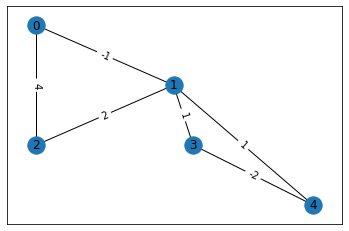

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import sys
from networkx.drawing.nx_pydot import graphviz_layout

class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []
 
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    #Funcion para imprimir las distancias
    def printArr(self, dist):
        print("Distancia de cada vértice al origen:")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))
 
    def BellmanFord(self, src, mostrar = True, visualize = False):
 
        #Se inicializa un arreglo con las distancias en infinito, excepto el nodo base
        dist = [float("Inf")] * self.V
        dist[src] = 0

        G = nx.Graph()
 
        #Iteramos el numero de nodos menos 1, ya que este el el maximo numero
        #de nodos desde un vertice al otro que habria que recorrer
        for _ in range(self.V - 1):

            for u, v, w in self.graph:
                #Actualizamos la distancia de los vertices adyacentes al vertice actual 
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:

                    if visualize:
                      G.add_node(u)
                      G.add_node(v)
                      G.add_edge(u, v, weight = dist[u]+w)

                    dist[v] = dist[u] + w

        #Comprobamos que no haya un ciclo negativo
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return
        
        if visualize:
          fig, ax = plt.subplots()
          ax.set_facecolor('white')
          pos = graphviz_layout (G, prog = "dot")

          labels = nx.get_edge_attributes(G, 'weight')
          nx.draw_networkx(G, pos)
          nx.draw_networkx_edge_labels(G, edge_labels= labels, pos = pos)

        if mostrar:
          self.printArr(dist)
 
 

if __name__ == '__main__':

    visualize = True

    g = Graph(5)
    g.addEdge(0, 1, -1)
    g.addEdge(0, 2, 4)
    g.addEdge(1, 2, 3)
    g.addEdge(1, 3, 2)
    g.addEdge(1, 4, 2)
    g.addEdge(3, 2, 5)
    g.addEdge(3, 1, 1)
    g.addEdge(4, 3, -3)

 
    # function call
    g.BellmanFord(0, True, visualize)

#3-Propiedades

#3.1-Tiempo de ejecucion

##Dijktra:

Para calcular el tiempo de Dijkstra se verán los procedimientos y estructruras en este:

Primero se ordenan los nodos según peso de menor a amtor, para esto se utiliza un mónticulo binario, lo que toma $O(log(n))$ con $n$ siendo la cantidad de datos en el grafo, y dado que el algoritmo necesita todos los nodos, realizará $V$ veces las operaciones $O(log(n))$ lo que tomá un total de $O(V*log(n))$.

Sumado a lo anterior también se debe de considerar el arco de menor peso hacia un nodo adyacente. Si se ven todos los arcos adyacente significa que se recorreran todos los arcos del grafo.

Por lo que tomando las partes anteriores en cuenta queda como:

$T(n) = c·E + V·O(log(V))$

$T(n) = c·E + c·V·log(V)$

$T(n) = c·(E + Vlog(V))$

$T(n) = O(E + Vlog(V))$

##Bellman-Ford:

Para estimar el tiempo de ejecución del algoritmo se utilizará la función:
> $f_{(n)} * g_{(n)} + h_{(n)}$

donde $f_{(n)}$ es la cantidad de sub-problemas a resolver, $g_{(n)}$ el tiempo en resolver cada sub-problema y $h_{(n)}$ el tiempo en procesar la solución.

*$f_{(n)}$:* Para un grafo con $V$ nodos y $E$ arcos, el total de sub-problemas se define según la cantidad de arcos, considerando que no serán mayores a $V-1$ y que no contiene ciclos negativos por cada uno de estos arcos. En una iteración significa pasar por todos los arcos del grafo, "operando" en cada arco un cantidad de $V-1$ veces.

*$g_{(n)}$:* Para resolver cada sub-problema se debe "operar" en cada arco, tomando esto $O(1)$ ya que la solución es tomada de la pasada anterior y lo que hace la operación en si es comparar la solución pasada con la nueva candidata.

*$h_{(n)}$:* El tiempo de esta parte se puede omitir ya que buscando la cota superior da $O(1)$ en instrucciones de almacenar las soluciones dinámicamente.

Reemplazando lo anterior nos da que:

>$T(n) = \sum_{j=1}^{V}\sum_{i=1}^{E}·c$
>
>$T(n) = c·\sum_{j=1}^{V}E$
>
>$T(n) = c·VE$
>
>$T(n) = O(VE)$

#3.2-Correctitud

Para comprobar la correctitud de Bellmand-Ford se utilizará inducción, para esto consideraremos 2 casos.

> Consideramos a $i$ como el tamaño del problema, $L$ como la distancia entre los nodos $q$ y $s$, con $q$ siendo el nodo de origen y $s$ el nodo de llegada

*Caso Base:* Con $i = 0$, la distancia $L_{q,q} == 0$ es correcta ya que es la distancia de un nodo hacia si mismo. Mientras que para otra distancia $L_{q,s} = ∞_+$ sería correcto ya que no existe un camino a un nodo $s$.

*Caso General:* 
> Para todo nodo $s$ con un camino $L_{q,s}$, el cual es el mínimo entre $q$ y $s$, se usaran a lo mucho $i-1$ arcos.

>Con $q \neq s$, $P$ será el camino más corto entre $q$ y $s$ con $i$ arcos como máximo, además de un nodo $k$ el cual es un nodo previo a $s$ en el camino $P$, siendo $P'$ el camino entre $q$ y $k$.

Tomando el cuenta los datos anteriores tendremos que el valor $L_{P'}$ del camino $P'$ es igual a $L_{i-1, k}$.

En cada n-ésima iteración se actualiza el valor $L_{k,s}$ al valor mínimo entre $L_{n-1, s}$ y $L_{n-1, k} + L_{k,s}$. Sabiendo que $L_{n-1, k} + L_{k,s}$ es igual a $L_{P'} + L_{k,s}$ Lo que a su vez es igual a $L_{P}$, por lo que $L_{n,s} ≤ L_{P}$. También $L_{n-1,s}$ es el valor del camino más corto entre $q$ y $s$ con un máximo de $i-1$ arcos, además de ser al menos igual de largo que $L_{P}$ y que $P$ posee más arcos a considerar.

En el caso que $L_{n,s} = L_{n-1,s}$, la solución al problema de menor tamaño anterior es una posible parte de la solución. En caso de que no exista tal camino $L_{n-1,s} = ∞_+$.

En caso que no ocurra el caso anterior se calcula $L_{n-1,k} + L_{k,s}$, lo cual da el valor de $P'$ más un úlitmo arco que conecte a $k$ con $s$. En caso de que tal camino no exista el valor será $∞_+$.

Asumiendo que las operaciones son correctas. $L_{n,s}$ será correcto ya que al ser dependiente de las soluciones de los sub-problemas, y estos a su vez fueron calculados correctamente da que la solución general es correcta.

Si los camino existen, el mínimo de los casos será $L_{n,s}$ = $P$, lo que significa que es el camino mínimo entre $q$ y $s$ con 4i$ arcos como máximo.

    V = la cantidad nodos en el grafo

Cuando $n = V$, si $L_{V-1,s} = L_{V,s}$ se habrán los caminos mínimos de forma correcta, retornando una lista de los largos correspondientes.

En caso que $L_{V-1,s} \neq  L_{V,s}$ significa que se encontró un ciclo negativo, retornando un mensaje respecto a esto.

Con todo lo anterior podemos decir que Bellmand-Ford es correcto.

#4-Experimentos

##Generador de instancias usado para los experimentos:

In [1]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]


##Tiempo de ejecución Bellman-Ford

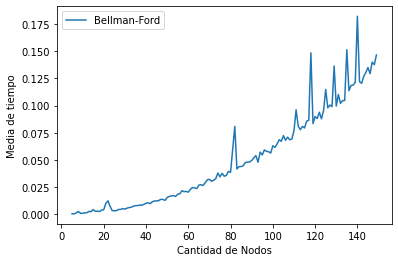

In [8]:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]



for n in range(5,150):
  cont = [0]
  g = Graph(n)
  g.graph,gi = instance_generator(n)

  t = repeat(setup = "from __main__ import Graph", stmt = lambda: g.BellmanFord(gi, False), number = 25, repeat = 10)
  sum = 0
  for i in range(len(t)):
    sum += t[i]

  prom = sum/25
  x.append(n)
  y.append(prom)


plt.plot(x,y)
plt.legend(["Bellman-Ford"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

###Análisis de resultados:
Podemos observar como la gráfica concuerda con el tiempo de ejecución analizado, ya que al aumentar la cantidad de vertices y arcos, aumenta también el tiempo de ejecución.

##4.2 Comparación tiempo de ejecución entre dijsktra y bellman-ford



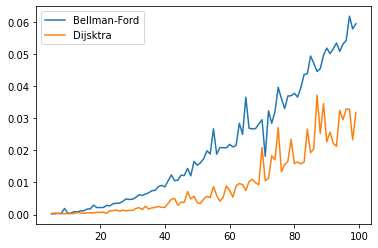

In [27]:
from timeit import repeat


x = []; y1=[]; y2= []

for n in range(5,100):
    g = Graph(n)
    g.graph,gi = instance_generator(n-1)

    g2 = Graph2(n)
    g2.graph,gi2 = instance_generator(n-1)

    t1 = repeat(setup = "from __main__ import Graph", stmt = lambda: g.BellmanFord(gi, False, False), number = 10, repeat = 1)
    t2 = repeat(setup = "from __main__ import Graph2", stmt = lambda: g2.dijkstra(gi2,False,False), number = 10, repeat = 1)
    x.append(n)
    y1.append(t1)
    y2.append(t2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Bellman-Ford", "Dijsktra"])

###Análisis de resultados:

Podemos observr que el algoritmo de Dijsktra es más rápido que el de Bellman-Ford, esto se debe a que este último tiene una complejidad temporal mayor, como el algoritmo de Dijsktra solamente selecciona la mejor opción disponible, realiza menos iteraciones.